# **CSI 382 - Data Mining and Knowledge Discovery**

# **Lab 3 - Exploratory Data Analysis**



# **Tasks**

Go to this [url](https://drive.google.com/file/d/13dnJ0Uszfcj95py2f17njZbE6HDa6BNS/view?usp=sharing) and download the data first. In order to know more about the dataset please refer to these links - [UCI/heart_disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), or [Kaggle/heart_disease](https://www.kaggle.com/ronitf/heart-disease-uci).

**The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.**

 Now try to do the following:

1. Find the correlation matrix of the variables, is there any correlation among variables?
2. Explore the categorical and numerical variables using histograms, scatterplots, boxplots. Can you find some pattern that indicates a relationship with the targe?
3. Can you do some scatterplots (either 2D or 3D) to find some interesting subsets of the data?


#**Solution**

**Ques 1**

## **GETTING TO KNOW THE DATA SET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/heart.csv')
#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

In [ ]:
df.head(10)

In [ ]:
print(df.dtypes)

#**Ques:2**

# Preprocess data

In [ ]:
df.columns

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    pre_df = df.copy()

    # Replace the spaces in the column names with underscores
    pre_df.columns = [s.replace(" ", "_") for s in pre_df.columns]

    # convert string columns to integers
    #pre_df["sex"] = pre_df["sex"].apply(lambda x: 0 if x=="no" else 1)
    #pre_df["fbs"] = pre_df["fbs"].apply(lambda x: 0 if x=="no" else 1)
    #pre_df["restecg"] = pre_df["restecg"].apply(lambda x: 0 if x=="no" else 1)
    #pre_df["exang"] = pre_df["exang"].apply(lambda x: 0 if x=="no" else 1)

    #Dropping unnecessary attribute
  #  pre_df = pre_df.drop(["phone_number"], axis=1)

    #Converting string to categorical vaiable
    le = LabelEncoder()
    le.fit(pre_df['age'])
    pre_df['age'] = le.transform(pre_df['age'])

    return pre_df

In [ ]:
pre_df = preprocess_data(df)

pre_df.head(3)

# Co-related Variables


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(14, 10))

corr = pre_df.corr()

ax = sns.heatmap(corr, cmap = "coolwarm")

ax.invert_yaxis()


plt.title("Heatmap of pairwise correlation of the columns")

plt.show()

# EXPLORING CATEGORICAL VARIABLES

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

result = ['no', 'yes']

hists = [len(pre_df[pre_df["target"] == 0]),len(pre_df[pre_df["target"] == 1])]#0=no_target,1=target
ax.bar(result,hists, color=['blue','red'],)#target=x-axis, hists=y-axis

plt.title("Heart Disease")
plt.ylabel('#samples')

plt.ylim(0,500)

plt.show()

In [ ]:
pre_df.shape

In [ ]:
target_perc = pre_df["target"].sum() * 100 / pre_df["target"].shape[0]
print("target percentage is %.3f%%." % target_perc)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

### **sex**

In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

colors = plotly.colors.DEFAULT_PLOTLY_COLORS
target_dict = {0: "no target", 1: "target"}

target = pre_df[pre_df["target"] == 1]
no_target = pre_df[pre_df["target"] == 0]

def create_target_trace(col, visible=False):
    return go.Histogram(
        x=target[col],
        name='target',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_no_target_trace(col, visible=False):
    return go.Histogram(
        x=no_target[col],
        name='no target',
        marker = dict(color = colors[0]),
        visible = visible,
    )

features_for_hist = ['sex']
active_idx = 0
traces_target = [(create_target_trace(col) if i != active_idx else create_target_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_no_target = [(create_no_target_trace(col) if i != active_idx else create_no_target_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
data = traces_target + traces_no_target

# n_features = len(features_for_hist)
# steps = []
# for i in range(n_features):
#     step = dict(
#         method = 'restyle',
#         args = ['visible', [False] * len(data)],
#         label = features_for_hist[i],
#     )
#     step['args'][1][i] = True # Toggle i'th trace to "visible"
#     step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
#     steps.append(step)


layout = dict(
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: ',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram')


### **restecg**



In [ ]:

#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

colors = plotly.colors.DEFAULT_PLOTLY_COLORS
target_dict = {0: "no target", 1: "target"}

target = pre_df[pre_df["target"] == 1]
no_target = pre_df[pre_df["target"] == 0]

def create_target_trace(col, visible=False):
    return go.Histogram(
        x=target[col],
        name='target',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_no_target_trace(col, visible=False):
    return go.Histogram(
        x=no_target[col],
        name='no target',
        marker = dict(color = colors[0]),
        visible = visible,
    )

features_for_hist = ['restecg']
active_idx = 0
traces_target = [(create_target_trace(col) if i != active_idx else create_target_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_no_target = [(create_no_target_trace(col) if i != active_idx else create_no_target_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
data = traces_target + traces_no_target

# n_features = len(features_for_hist)
# steps = []
# for i in range(n_features):
#     step = dict(
#         method = 'restyle',
#         args = ['visible', [False] * len(data)],
#         label = features_for_hist[i],
#     )
#     step['args'][1][i] = True # Toggle i'th trace to "visible"
#     step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
#     steps.append(step)


layout = dict(
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: ',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram')

Output hidden; open in https://colab.research.google.com to view.

### **age**



In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

colors = plotly.colors.DEFAULT_PLOTLY_COLORS
target_dict = {0: "no target", 1: "target"}



age_target_df = df.groupby(["age", "target"]).size().unstack()
trace1 = go.Bar(
    x=age_target_df.index,
    y=age_target_df[0],
    marker = dict(color = colors[0]),
    name='no target'
)
trace2 = go.Bar(
    x=age_target_df.index,
    y=age_target_df[1],
    marker = dict(color = colors[1]),
    name='target'
)
data = [trace1, trace2]
layout = go.Layout(
    title='target distribution per state',
    autosize=True,
    barmode='stack',
    margin=go.layout.Margin(l=50, r=50),
    xaxis=dict(
        title='age',
        tickangle=45
    ),
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')


Output hidden; open in https://colab.research.google.com to view.

### **Can you find a pattern?**

In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

colors = plotly.colors.DEFAULT_PLOTLY_COLORS
target_dict = {0: "no target", 1: "target"}

target = pre_df[pre_df["target"] == 1]
no_target = pre_df[pre_df["target"] == 0]

features_not_for_hist = ["age", "sex", "cp	","target" ,"trestbps", "chol	", "fbs", "restecg","thalach","oldpeak","slope","thal",]
features_for_hist = [x for x in pre_df.columns if x not in features_not_for_hist]
active_idx = 0
traces_target = [(create_target_trace(col) if i != active_idx else create_target_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_no_target = [(create_no_target_trace(col) if i != active_idx else create_no_target_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
data = traces_target + traces_no_target

n_features = len(features_for_hist)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_hist[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ",
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram_slider')

Output hidden; open in https://colab.research.google.com to view.

## **Distribution Box Plots**

Next, we take a look at the box plots for each feature. A box plot visualizes the following statistics:
* median
* the first quartile (Q1) and the third quartile (Q3) building the interquartile
* range (IQR)
* the lower fence (Q1 - 1.5 IQR) and the upper fence (Q3 + 1.5 IQR)
* the maximum and the minimum value

In [ ]:
configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

def create_box_target_trace(col, visible=False):
    return go.Box(
        y=target[col],
        name='target',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_box_no_target_trace(col, visible=False):
    return go.Box(
        y=no_target[col],
        name='no target',
        marker = dict(color = colors[0]),
        visible = visible,
    )

features_not_for_hist = ["age", "sex", "target"]
features_for_hist = [x for x in pre_df.columns if x not in features_not_for_hist]
# remove features with too less distinct values (e.g. binary features), because boxplot does not make any sense for them
features_for_box = [col for col in features_for_hist if len(target[col].unique())>5]

active_idx = 0
box_traces_target = [(create_box_target_trace(col) if i != active_idx else create_box_target_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
box_traces_no_target = [(create_box_no_target_trace(col) if i != active_idx else create_box_no_target_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
data = box_traces_target + box_traces_no_target

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_box[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ",
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='box_slider')

Output hidden; open in https://colab.research.google.com to view.

## **USING EDA TO UNCOVER ANOMALOUS FIELDS**

Exploratory data analysis will sometimes uncover strange or anomalous records
or fields which the earlier data cleaning phase may have missed. Consider, for
example, the area code field in the present data set. Although the area codes
contain numerals, they can also be used as categorical variables, since they can
classify customers according to geographical location.

In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

state_churn_df = df.groupby(["age", "target"]).size().unstack()
trace1 = go.Bar(
    x=age_target_df.index,
    y=age_target_df[0],
    marker = dict(color = colors[0]),
    name='no target'
)
trace2 = go.Bar(
    x=age_target_df.index,
    y=age_target_df[1],
    marker = dict(color = colors[1]),
    name='target'
)
data = [trace1, trace2]
layout = go.Layout(
    title='target distribution per age',
    autosize=True,
    barmode='stack',
    margin=go.layout.Margin(l=50, r=50),
    xaxis=dict(
        title='age',
        tickangle=45
    ),
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')


Output hidden; open in https://colab.research.google.com to view.

### **Inference**

We should therefore be wary of this area code field, perhaps going so far as not
to include it as input to the data mining models in the next phase. On the other
hand, it may be the state field that is in error. Either way, further communication
with someone familiar with the data history, or a domain expert, is called for
before inclusion of these variables in the data mining models.

## **EXPLORING NUMERICAL VARIABLES**

Next, we turn to an exploration of the numerical predictive variables. We begin
with numerical summary measures, including minimum and maximum; mea-
sures of center, such as mean, median, and mode; and measures of variability,
such as standard deviation. Figure 16 shows these summary measures for some
of our numerical variables. We see, for example, that the minimum account
length is one month, the maximum is 243 months, and the mean and median
are about the same, at around 101 months, which is an indication of symmetry.
Notice that several variables show this evidence of symmetry, including all the
minutes, charge, and call fields.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **thalach**


In [ ]:

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

def create_churn_trace(col, visible=False):
    return go.Histogram(
        x=target[col],
        name='target',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_no_churn_trace(col, visible=False):
    return go.Histogram(
        x=no_target[col],
        name='no target',
        marker = dict(color = colors[0]),
        visible = visible,
    )

features_for_hist = ['thalach']
active_idx = 0
traces_target = [(create_target_trace(col) if i != active_idx else create_target_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_no_target = [(create_no_target_trace(col) if i != active_idx else create_no_target_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
data = traces_target + traces_no_target

n_features = len(features_for_hist)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_hist[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)


layout = dict(
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: thalach',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram')


Output hidden; open in https://colab.research.google.com to view.

#**Ques:3**

## **EXPLORING MULTIVARIATE RELATIONSHIPS - Scatter-plots**

We turn next to an examination of possible multivariate associations of numeri-
cal variables with churn, using two- and three-dimensional scatter plots.

### **2-D Scatterplots**

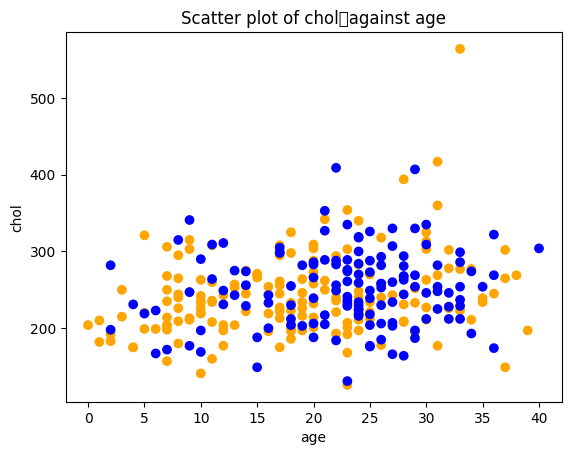

In [ ]:
import matplotlib
#figure(figsize=(10, 8), dpi=80)

label = [0,1]
colors = ['blue','orange']

scatter = plt.scatter(pre_df['age'], pre_df['chol'], c=pre_df['target'], cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Scatter plot of chol	against age')
#plt.legend(handles=scatter.legend_elements()[0], labels=target)
plt.show()

### **3-D Scatterplots**

Sometimes, three-dimensional scatter plots can be helpful as well.

In [ ]:
import plotly.graph_objects as go
import numpy as np
configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

x, y, z = pre_df['age'], pre_df['chol'], pre_df['trestbps']

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
    mode='markers', marker=dict(
        size=4,
        color = pre_df['target'].astype(int),
        opacity=0.8
    ),

    )])
fig.update_layout(scene = dict(
                    xaxis_title='age',
                    yaxis_title='chol',
                    zaxis_title='trestbps	'),margin=dict(l=0, r=0, b=0, t=0))
fig.show()


Output hidden; open in https://colab.research.google.com to view.

## **SELECTING INTERESTING SUBSETS OF THE DATA FOR FURTHER INVESTIGATION**

We may use scatter plots (or histograms) to identify interesting subsets of the
data, in order to study these subsets more closely. In Figure 3.25 we see that
customers with high day minutes and high evening minutes are more likely to
churn.

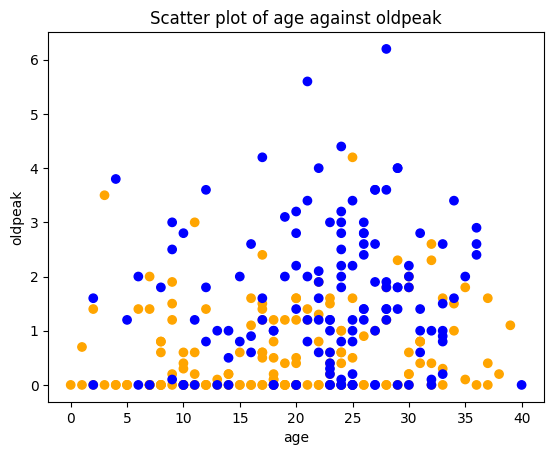

In [ ]:
import matplotlib
# figure(figsize=(10, 8), dpi=80)

label = [0,1]
colors = ['blue','orange']

scatter = plt.scatter(pre_df['age'], pre_df['oldpeak'], c=pre_df['target'], cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('age')
plt.ylabel('oldpeak')
plt.title('Scatter plot of age against oldpeak')
#plt.legend(handles=scatter.legend_elements()[0], labels=target)
# plt.grid(True)
plt.show()

## **Binning**

There are various strategies for binning numerical variables. One approach is to
make the classes of equal width, analogous to equal-width histograms. Another
approach is to try to equalize the number of records in each class. You may
consider yet another approach, which attempts to partition the data set into
identifiable groups of records, which, with respect to the target variable, have
behavior similar to that for other records in the same class.

In [ ]:

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

def create_churn_trace(col, visible=False):
    return go.Histogram(
        x=target[col],
        name='target',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_no_churn_trace(col, visible=False):
    return go.Histogram(
        x=no_target[col],
        name='no target',
        marker = dict(color = colors[0]),
        visible = visible,
    )

features_for_hist = ['trestbps']
active_idx = 0
traces_target = [(create_target_trace(col) if i != active_idx else create_target_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_no_target = [(create_no_target_trace(col) if i != active_idx else create_no_churn_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
data = traces_target + traces_no_target

n_features = len(features_for_hist)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_hist[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)


layout = dict(
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: trestbps',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

def create_churn_trace(col, visible=False):
    return go.Histogram(
        x=target[col],
        name='target',
        marker = dict(color = colors[1]),
        visible=visible,
        xbins=dict(
            start=x.min(),
            end=x.max()+1,
            size=4
        ),
        autobinx = False
    )

def create_no_target_trace(col, visible=False):
    return go.Histogram(
        x=no_target[col],
        name='no target',
        marker = dict(color = colors[0]),
        visible = visible,
        xbins=dict(
                        start=x.min(),
                        end=x.max()+1,
                        size=4
                     ),
                     autobinx = False
    )

features_for_hist = ['chol']
active_idx = 0
traces_target = [(create_target_trace(col) if i != active_idx else create_target_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_no_churn = [(create_no_target_trace(col) if i != active_idx else create_no_target_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
data = traces_target + traces_no_target


layout = dict(
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: chol',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram')


Output hidden; open in https://colab.research.google.com to view.